## 1) Title and Problem Statement

#### Title
Analysis of trending topics over a period of time.


#### Problem Statement
We want to extract hot and trending research topics from the NeurIPS publication dataset in a given period.

## 2) Hypotheses

### Kshitij Kumar

#### Hypothesis 1:
Since there has been a recent improvement in hardware and huge inflow of data within last few decades, we are hypothesizing that the number of research papers would increase considerably in recent times.

#### Hypothesis 2:
Since there has been a recent boom in machine learning and deep learning, we are hypothesizing that the research papers published on Neural Network and Reinforcement Learning have increased over time.

### Amritesh Kuraria

#### Hypothesis 3.
Since the release of chatgpt we are hypothesizing that there is an increase in research on large language models, Transformers.




#### Hypothesis 4.

Decreasing Trend of VLSI, Analog shows how these technologies are becoming obsolete.

### Shubham Shubham

#### Hypothesis 5.
We are hypothesizing that the works in machine learning and probabilistic models have increased over time, so there should be an increase in the word "model".

#### Hypothesis 6.
Temporal difference of the word "deep reinforcement learning" over time should be on a rise.




## 3. Data Retrieval

We have taken data from two sources: NeurIPS website and Kaggle.

Kaggle only had data till 2020. For fetching data from 2021 and ahead, we have downloaded data from NeurIPS.

[NeurIPS link](https://neurips.cc/Downloads)

[Link for kaggle's dataset](https://www.kaggle.com/datasets/rowhitswami/nips-papers-1987-2019-updated)

## 4. Data Cleaning and preprocessing

#### 1) Dropping columns which are unnamed. (Shubham)
#### 2) Replacing 'NA' with spaces. (Kshitij)
#### 3) Merged datasets downloaded from diffrent sources.(Amritesh)
#### 4) There were NAN vlaues in abstract so we extracted abstract from full text. For this we extracted the data till introduction in full text and replaced the NAN vlaues in abstract columns with this. We have calculated the mean length of abstract and sliced that much text from full text(Shubham)
#### 5) There were few columns were abstract and full text both were NAN so we dropped those Rows.(Kshitij)
#### 6) Converted all the strings into lower case string.(Amritesh)
#### 7) We have Dropped all the stopwords.(Shubham)
#### 8) We have tokenized all the words.(Kshitij)
#### 9) We have limitized all the words.(Amritesh)
#### 10) We have dropped characters(letters, digits, and underscores) and white spaces.(Shubham)
#### 11). we have created Bigrams and Trigrams tokens. (Shubham)

## 5. EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("merged_data.csv" )
#  Dropping columns which are unnamed
df.drop(columns=["Unnamed: 0"] , inplace=True)
# Replacing 'NA' with spaces.
df.replace( pd.NA , '' , inplace=True)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25269 entries, 0 to 25268
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     25269 non-null  object
 1   abstract  25269 non-null  object
 2   year      25269 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 592.4+ KB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

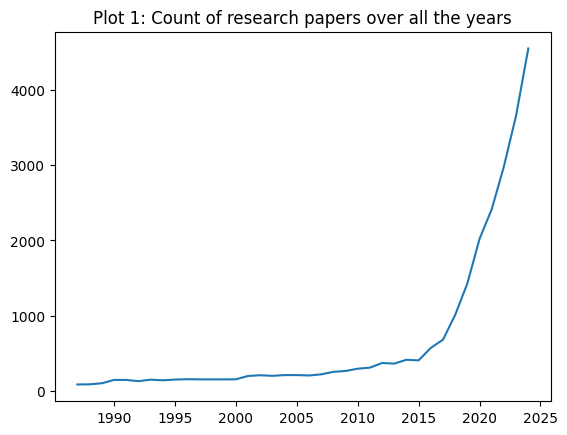

In [ ]:
plt.plot(df.groupby(by="year").count()["abstract"])
plt.title('Plot 1: Count of research papers over all the years')
plt.show()

In [ ]:
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### From the above plot, it can be observed that there has been a significant increase in the publishing of research papers after 2015, thus justifing the **hypothesis 1** (Kshitij)

In [ ]:
def preprocessing_text_col(df ):
    df = df.str.lower()
    df = df.apply(lambda x: re.sub(r'[^\w\s]', '', x))
    df = df.apply(nltk.word_tokenize)
    df = df.apply(lambda x: [word for word in x if word not in stopwords])
    df = df.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    return df

df["prep_title"] = preprocessing_text_col(df["title"])

In [ ]:
period = 3
df[f'year_group'] = (df['year'] // period) * period
df.head()

,title,abstract,year,prep_title,year_group
0,Bit-Serial Neural Networks,a bit - serial vlsi neural network is...,1987,"[bitserial, neural, network]",1986
1,Connectivity Versus Entropy,how does the connectivity of a neural ...,1987,"[connectivity, versus, entropy]",1986
2,The Hopfield Model with Multi-Level Neurons,the hopfield neural network. model for...,1987,"[hopfield, model, multilevel, neuron]",1986
3,How Neural Nets Work,: there is presently great interest in the ...,1987,"[neural, net, work]",1986
4,Spatial Organization of Neural Networks: A Pro...,the aim of this paper is to explore ...,1987,"[spatial, organization, neural, network, proba...",1986


In [ ]:
def combine_token_agg(x):
    all_words = []
    for word_list in x:
        all_words.extend(word_list)
    return all_words

In [ ]:
comb_df = df[["year_group" , "prep_title"]].groupby("year_group").agg(
    comb_word = ( "prep_title" , combine_token_agg )
)
comb_df["frequency"] = comb_df["comb_word"].apply(Counter)
comb_df.head()

,comb_word,frequency
year_group,,
1986,"[bitserial, neural, network, connectivity, ver...","{'bitserial': 1, 'neural': 63, 'network': 74, ..."
1989,"[comparing, performance, connectionist, statis...","{'comparing': 1, 'performance': 8, 'connection..."
1992,"[parameterising, feature, sensitive, cell, for...","{'parameterising': 1, 'feature': 9, 'sensitive..."
1995,"[learning, predict, visibility, invisibility, ...","{'learning': 95, 'predict': 2, 'visibility': 1..."
1998,"[computational, difference, asymmetrical, symm...","{'computational': 3, 'difference': 1, 'asymmet..."


In [ ]:
all_words = combine_token_agg(comb_df.comb_word.to_list())
corpus_freq = Counter(all_words)
corpus = list(set(all_words))
corpus[:10]
print(len(corpus) , corpus[:10])

16819 ['falsification', 'execute', 'productive', 'mastery', 'payperreward', 'callback', 'multiplicationfree', 'modulation', 'remap', 'crossvideo']


In [ ]:
def get_freq_over_time(comb_df , word):
    word_freq = [comb_df.iloc[i].frequency[word] for i in range(len(comb_df))]
    return list(comb_df.index) , word_freq

#year ,word_freq = get_freq_over_time(comb_df , "analog")
#plt.plot(year ,word_freq)

In [ ]:
slope_mapping = {}
for word in list(set(corpus)):
    year ,word_freq =  get_freq_over_time(comb_df , word)
    slope = np.polyfit(year , word_freq , deg = 1)[-2]
    slope_mapping[word] = float(slope)
slope_df = pd.DataFrame(slope_mapping.items() , columns= ["word" , "slope"])
slope_df.head()

,word,slope
0,falsification,0.021978
1,execute,0.045788
2,mastery,0.010989
3,productive,0.007326
4,payperreward,0.009158


In [ ]:
inc_word_df = slope_df[slope_df["slope"] > 4].sort_values("slope" , ascending=False)
dec_word_df = slope_df[slope_df["slope"] < -0.1].sort_values("slope" , ascending=True)
inc_word_df.head()

,word,slope
8050,learning,47.256410
1526,model,25.133700
3756,neural,15.600733
1595,network,14.322344
211,via,14.276557


In [ ]:
dec_word_df.head()

,word,slope
4288,analog,-0.357143
2655,connectionist,-0.349817
12981,vlsi,-0.282051
7107,associative,-0.139194
15433,selforganizing,-0.119048


In [ ]:
for word in inc_word_df.word.to_list():
    if word == 'machine':
        year ,word_freq = get_freq_over_time(comb_df , word)
        plt.figure(figsize=(7,3))
        plt.plot(year , word_freq)
        plt.title(f"Word : {word}")
        plt.show()

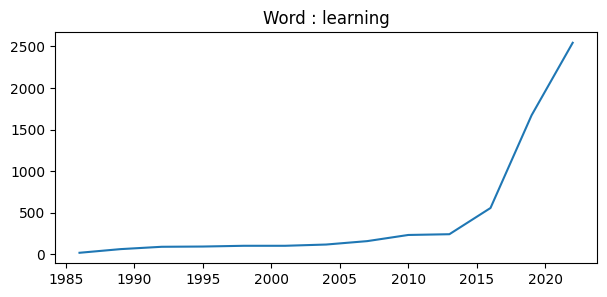

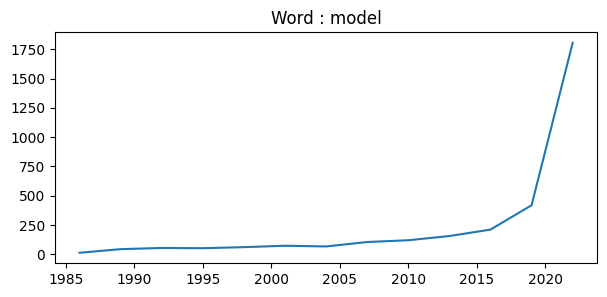

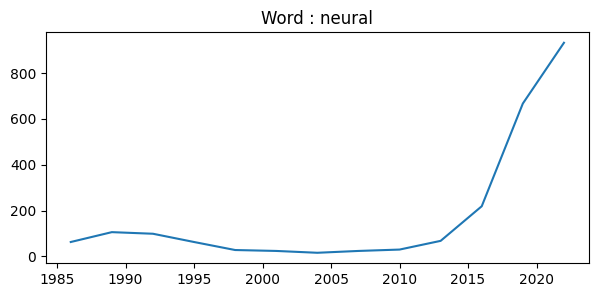

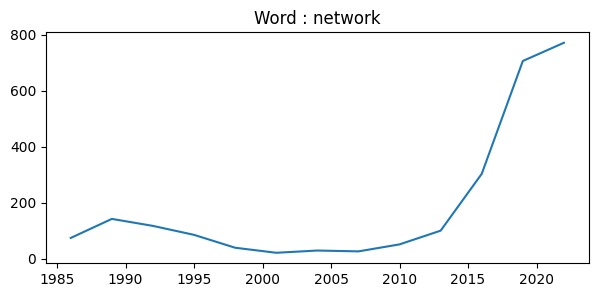

In [ ]:
for word in inc_word_df.word.to_list()[:4]:
    #print(word)
    year ,word_freq = get_freq_over_time(comb_df , word)
    plt.figure(figsize=(7,3))
    plt.plot(year , word_freq)
    plt.title(f"Word : {word}")
    plt.show()

From the above plot, we can see that the word "model" has been coming up after 2015, hence justifing **Hypothesis 5** (Shubham)

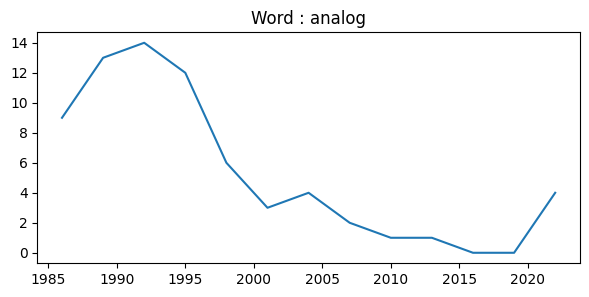

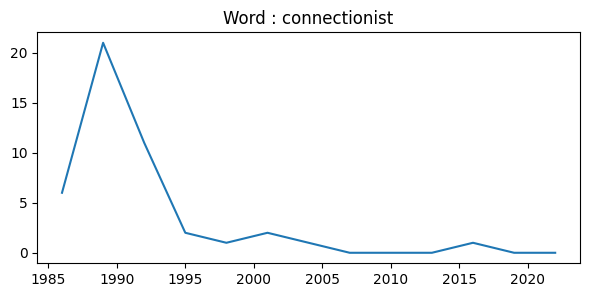

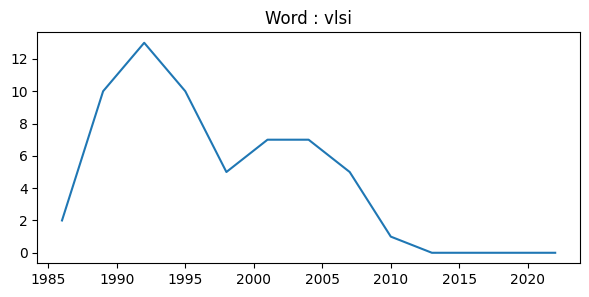

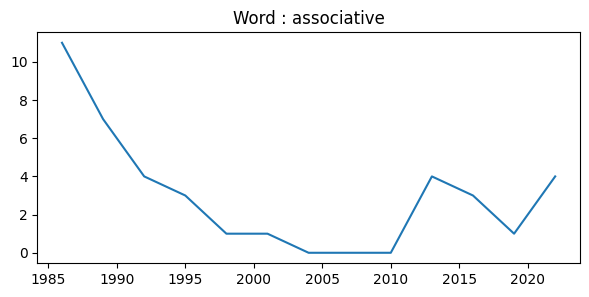

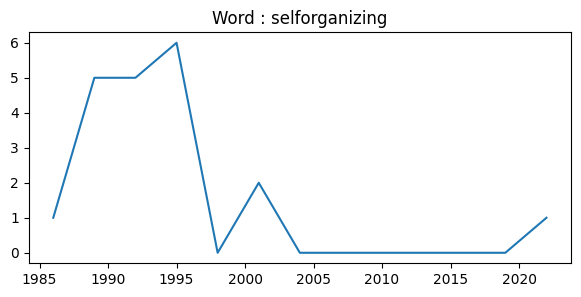

In [ ]:
for word in dec_word_df.word.to_list()[:5]:
    #print(word)
    year ,word_freq = get_freq_over_time(comb_df , word)
    plt.figure(figsize=(7,3))
    plt.plot(year , word_freq)
    plt.title(f"Word : {word}")
    plt.show()

Decreasing Trend of VLSI, Analog shows how these technologies are getting less popular over time, hence justifying **hypothesis 4** (Amritesh)

In [ ]:
def get_bigram(x):
    return [" ".join(tokens) for tokens in list(bigrams(x))]

def get_trigram(x):
    return [" ".join(tokens) for tokens in list(trigrams(x))]

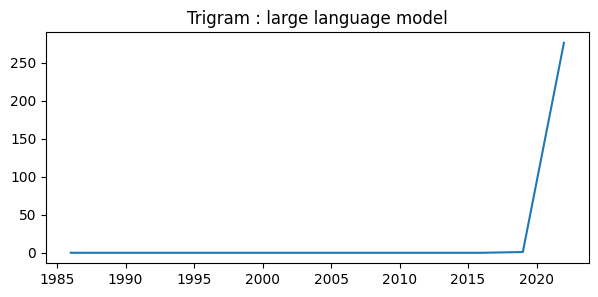

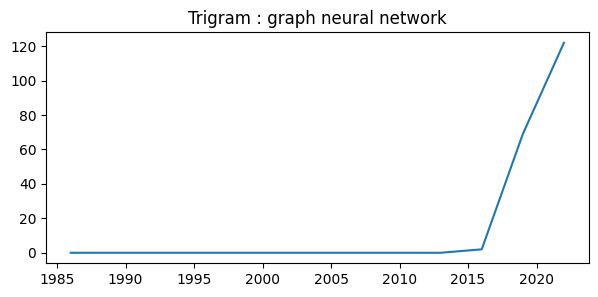

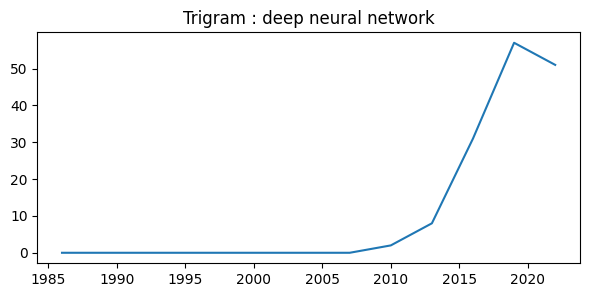

In [ ]:
# prompt: plot graph over years for top 3 trigram

from nltk import bigrams, trigrams

df["prep_title_trigram"] = df["prep_title"].apply(get_trigram)

def combine_token_agg_trigram(x):
    all_words = []
    for word_list in x:
        all_words.extend(word_list)
    return all_words


comb_df_trigram = df[["year_group" , "prep_title_trigram"]].groupby("year_group").agg(
    comb_word = ( "prep_title_trigram" , combine_token_agg_trigram )
)
comb_df_trigram["frequency"] = comb_df_trigram["comb_word"].apply(Counter)

all_words_trigram = combine_token_agg_trigram(comb_df_trigram.comb_word.to_list())
corpus_freq_trigram = Counter(all_words_trigram)
corpus_trigram = list(set(all_words_trigram))

slope_mapping_trigram = {}
for word in list(set(corpus_trigram)):
    year ,word_freq =  get_freq_over_time(comb_df_trigram , word)
    slope = np.polyfit(year , word_freq , deg = 1)[-2]
    slope_mapping_trigram[word] = float(slope)

slope_df_trigram = pd.DataFrame(slope_mapping_trigram.items() , columns= ["word" , "slope"])
inc_word_df_trigram = slope_df_trigram[slope_df_trigram["slope"] > 0].sort_values("slope" , ascending=False)

for word in inc_word_df_trigram.word.to_list()[:3]:
    year ,word_freq = get_freq_over_time(comb_df_trigram , word)
    plt.figure(figsize=(7,3))
    plt.plot(year , word_freq)
    plt.title(f"Trigram : {word}")
    plt.show()


Since the release of chatgpt we are hypothesizing that there is an increase in research on large language models, deep neural network, hence justifying **hypothesis 3** (Amritesh)

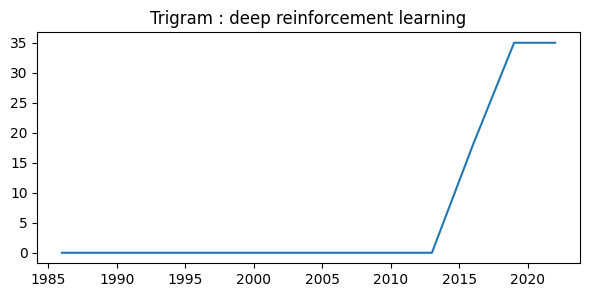

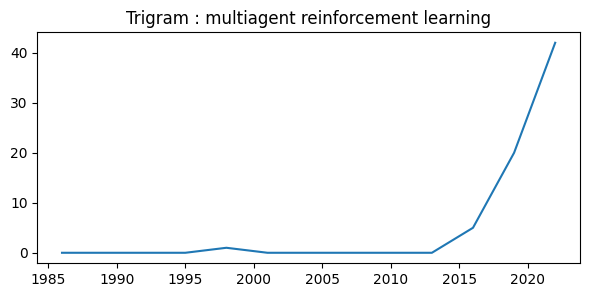

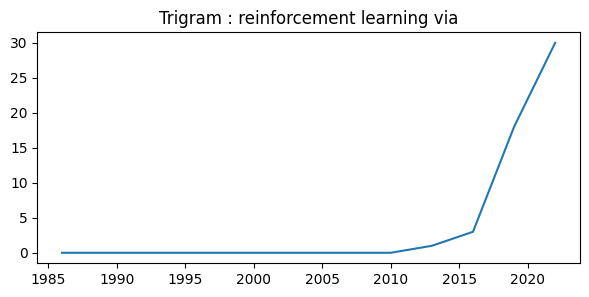

In [53]:
for word in inc_word_df_trigram.word.to_list()[4:7]:
    year ,word_freq = get_freq_over_time(comb_df_trigram , word)
    plt.figure(figsize=(7,3))
    plt.plot(year , word_freq)
    plt.title(f"Trigram : {word}")
    plt.show()

From the above plot, we can see that temporal difference of deep reinforcement learning is increasing over time, hence justifying our **hypothesis 6**. (Shubham)

In [ ]:
from nltk import bigrams, trigrams

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import RegexpTokenizer
re_tokenizer = RegexpTokenizer("[a-zA-Z]+")

def get_bigram(x):
    return [" ".join(tokens) for tokens in list(bigrams(x))]

def get_trigram(x):
    return [" ".join(tokens) for tokens in list(trigrams(x))]


df["bigram_token"] = df["prep_title"].apply(get_bigram)
df["trigram_token"] = df["prep_title"].apply(get_trigram)

comb_df = df[["year_group" , "trigram_token"]].groupby("year_group").agg(
    comb_word = ( "trigram_token" , combine_token_agg )
)
comb_df["frequency"] = comb_df["comb_word"].apply(Counter)
comb_df.head()

all_words = combine_token_agg(comb_df.comb_word.to_list())
corpus_freq = Counter(all_words)
corpus = list(set(all_words))
corpus[:10]
print(len(corpus) , corpus[:10])

def get_freq_over_time(comb_df , word):
    word_freq = [comb_df.iloc[i].frequency[word] for i in range(len(comb_df))]
    return list(comb_df.index) , word_freq

#year ,word_freq = get_freq_over_time(comb_df , "analog")
#plt.plot(year ,word_freq)



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


104173 ['generalized semisupervised learning', 'neural lad neural', 'understanding nonlinearity graph', 'continuous parametric optical', 'towards challenging real', 'adaptation discriminative model', 'multimodal information bottleneck', 'blood cell identification', 'select exogenous event', 'bias policy optimization']


In [ ]:
slope_mapping = {}
for word in list(set(corpus)):
    year ,word_freq =  get_freq_over_time(comb_df , word)
    slope = np.polyfit(year , word_freq , deg = 1)[-2]
    slope_mapping[word] = float(slope)
slope_df = pd.DataFrame(slope_mapping.items() , columns= ["word" , "slope"])
slope_df.head()

,word,slope
0,generalized semisupervised learning,0.010989
1,neural lad neural,0.010989
2,understanding nonlinearity graph,0.010989
3,continuous parametric optical,0.010989
4,towards challenging real,0.010989


In [ ]:
inc_word_df = slope_df[slope_df["slope"] > 0.1].sort_values("slope" , ascending=False)
dec_word_df = slope_df[slope_df["slope"] < -0.1].sort_values("slope" , ascending=True)
inc_word_df["word"].to_list()

dec_word_df = slope_df[slope_df["slope"] < -0.04].sort_values("slope" , ascending=False)
dec_word_df



,word,slope
84369,neural network classifier,-0.040293
66569,using neural network,-0.040293
66138,analog neural network,-0.043956
51994,basis function network,-0.051282
21909,vlsi neural network,-0.053114
103635,continuous speech recognition,-0.067766
11050,radial basis function,-0.109890


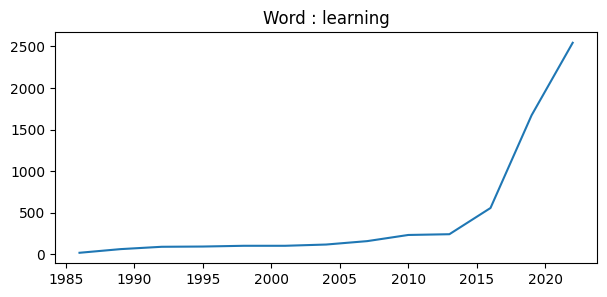

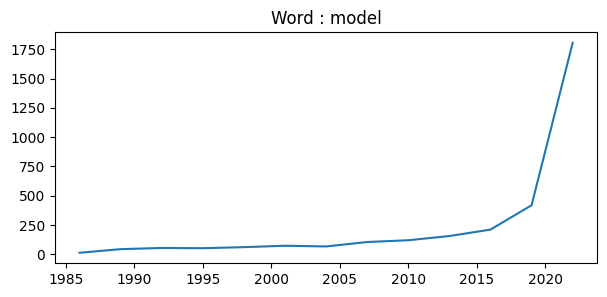

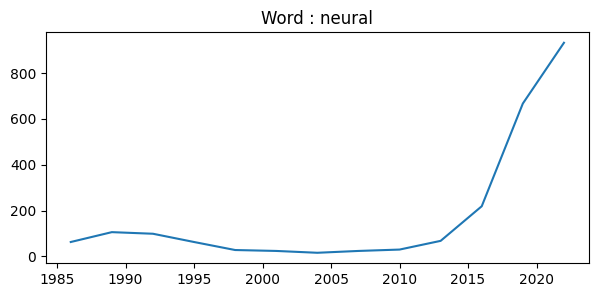

In [54]:
for word in inc_word_df.word.to_list()[:3]:
    #print(word)
    year ,word_freq = get_freq_over_time(comb_df , word)
    plt.figure(figsize=(7,3))
    plt.plot(year , word_freq)
    plt.title(f"Word : {word}")
    plt.show()

Temporal difference of some words over time deep reinforcement learning.

In [ ]:
bigram_comb_df = df[["year_group" , "bigram_token"]].groupby("year_group").agg(
    comb_word = ( "bigram_token" , combine_token_agg )
)
bigram_comb_df["frequency"] = bigram_comb_df["comb_word"].apply(Counter)
bigram_comb_df.head()

all_words = combine_token_agg(bigram_comb_df.comb_word.to_list())
corpus_freq = Counter(all_words)
corpus = list(set(all_words))
corpus[:10]
print(len(corpus) , corpus[:10])

def get_freq_over_time(bigram_comb_df , word):
    word_freq = [bigram_comb_df.iloc[i].frequency[word] for i in range(len(bigram_comb_df))]
    return list(bigram_comb_df.index) , word_freq



89701 ['sgd learn', 'perturbation invariance', 'kernel collapse', 'manipulate anything', 'gan training', 'robust prediction', 'strandbased hair', 'general retrievalaugmented', 'isometric 3d', 'recognition stochastic']


In [ ]:
slope_mapping = {}
for word in list(set(corpus)):
    year ,word_freq =  get_freq_over_time(bigram_comb_df , word)
    slope = np.polyfit(year , word_freq , deg = 1)[-2]
    slope_mapping[word] = float(slope)
slope_df = pd.DataFrame(slope_mapping.items() , columns= ["word" , "slope"])
slope_df.head()

,word,slope
0,sgd learn,0.009158
1,kernel collapse,0.010989
2,perturbation invariance,0.007326
3,manipulate anything,0.010989
4,gan training,0.087912


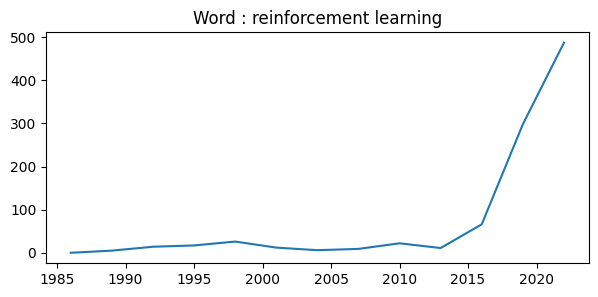

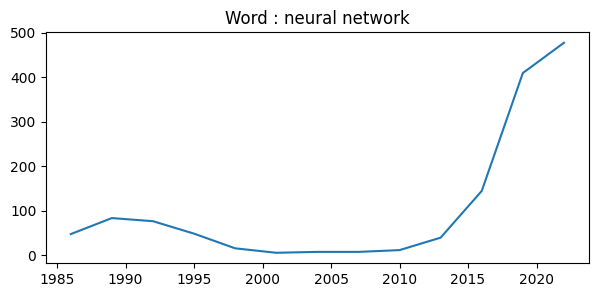

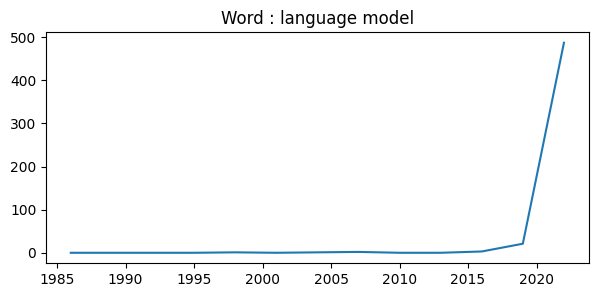

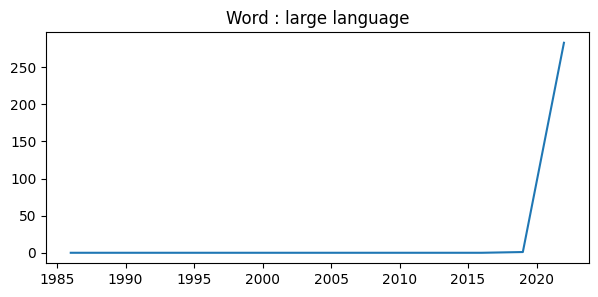

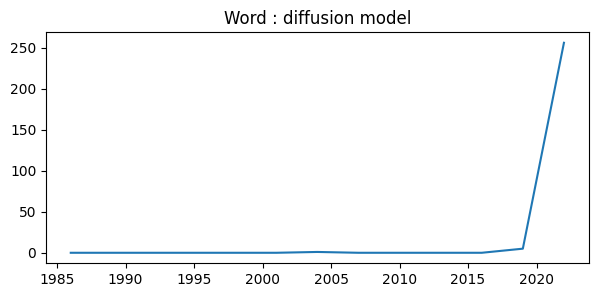

In [ ]:
inc_word_df = slope_df[slope_df["slope"] > 0.1].sort_values("slope" , ascending=False)
dec_word_df = slope_df[slope_df["slope"] < -0.1].sort_values("slope" , ascending=True)
inc_word_df["word"].to_list()

dec_word_df = slope_df[slope_df["slope"] < -0.04].sort_values("slope" , ascending=False)
dec_word_df


for word in inc_word_df.word.to_list()[:5]:
    #print(word)
    year ,word_freq = get_freq_over_time(bigram_comb_df , word)
    plt.figure(figsize=(7,3))
    plt.plot(year , word_freq)
    plt.title(f"Word : {word}")
    plt.show()

From the above plot we can see that there has been an increment in neural network and reinforcement learning after 2019, hence justifying **hypothesis 2**. (Kshitij)